In [100]:
# imports e tabela 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


ccc = pd.read_csv('ENEM/DADOS/BankChurners.csv')
ccc

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [101]:
# colunas a serem dropadas do DF por falta de info ou dados não importantes
dropar = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
ccc.drop(axis = 1, columns = dropar, inplace = True)

In [60]:
# procurando os NaN e como estão nomeados, trocando o nome por np.NaN. Mas as colunas que julgamos mais importantes são outras que não tem 'unknown'
for i in ccc.columns:
    print(ccc[i].unique())
ccc.replace('Unknown', np.nan, inplace = True)

[768805383 818770008 713982108 ... 716506083 717406983 714337233]
['Existing Customer' 'Attrited Customer']
[45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
['M' 'F']
[3 5 4 2 0 1]
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Unknown' 'Divorced']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
['Blue' 'Gold' 'Silver' 'Platinum']
[39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14]
[5 6 4 3 2 1]
[1 4 2 3 6 0 5]
[3 2 0 1 4 5 6]
[12691.  8256.  3418. ...  5409.  5281. 10388.]
[ 777  864    0 ...  534  476 2241]
[11914.  7392.  3418. ... 11831.  5409.  8427.]
[1.335 1.541 2.594 ... 0.222 0.204 0.166]
[ 1144  1291  1887 ... 10291  8395 10294]
[ 42  33  20  28  24  31  36  32  26  17  29  27  21  30  16  18  23  22
  40  38  

In [102]:
# trocando todas as colunas que tem strings por grupos de valores inteiros entre 0 e x.
ccc['Income_Category'] = ccc['Income_Category'].replace(
    {'Unknown': 0, 'Less than $40K': 1, 
        '$40K - $60K': 2, '$60K - $80K': 3, 
        '$80K - $120K': 4, '$120K +': 5})

ccc['Attrition_Flag'] = ccc['Attrition_Flag'].replace(
    {'Attrited Customer': 1, 'Existing Customer': 0})

ccc['Gender'] = ccc['Gender'].replace(
    {'F': 0, 'M': 1})

ccc['Education_Level'] = ccc['Education_Level'].replace(
    {'Unknown': 0, 'Uneducated': 1, 'High School': 2,
    'College': 3, 'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6})

ccc['Marital_Status'] = ccc['Marital_Status'].replace(
    {'Unknown': 0, 'Single': 1, 'Married': 2, 'Divorced': 3})

ccc['Card_Category'] = ccc['Card_Category'].replace(
    {'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3})

ccc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  int64  
 6   Marital_Status            10127 non-null  int64  
 7   Income_Category           10127 non-null  int64  
 8   Card_Category             10127 non-null  int64  
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

--------------------------------

### como trataríamos os NaNs
#### os NaNs entraram em grupos, todos que existem na posição 0

* educação: distribuir na proporção que eles aparecem, mantendo a média dos que vieram preenchidos no DF
* estado civil: dropar as linhas parece fazer mais sentido do que completa-las
* income: copiar o limite de crédito como se fosse dentro do limite inferior da faixa ou ordenando credit limit e dando fillna

##### onde os NaN estão situados
`ccc.isnull().sum()`

##### drop de todas as linhas com NaN. Ao fim vamos ver se devemos substituilos por outros valores
`ccc.dropna(inplace = True)`

* há na coluna Months_on_book uma concentração de valores em 36 meses. Aparentam seguir as médias das outras linhas, mas em torno de 25% do total das observações é 36 meses. Não conseguimos explicar o porquê

---------------

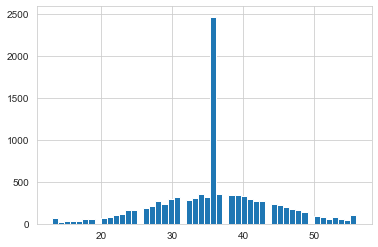

In [107]:
plt.hist(ccc['Months_on_book'], bins = 50)
plt.show()

In [7]:
# filtro com pessoas que saíram e ver o perfil delas em relação a média total
ccc_atritados = ccc[ccc["Attrition_Flag"] == "Attrited Customer"]
ccc_existentes= ccc[ccc["Attrition_Flag"] == "Existing Customer"]

In [64]:
ccc_atritados[(ccc_atritados['Months_on_book'] <= 40) & (ccc_atritados['Months_on_book'] >= 30)].count()
# df[(df["Fare"] >= 260) & (df["Sex"] == 'female')]

CLIENTNUM               636
Attrition_Flag          636
Customer_Age            636
Gender                  636
Dependent_count         636
Education_Level         636
Marital_Status          636
Income_Category         636
Card_Category           636
Months_on_book          636
Credit_Limit            636
Total_Amt_Chng_Q4_Q1    636
dtype: int64

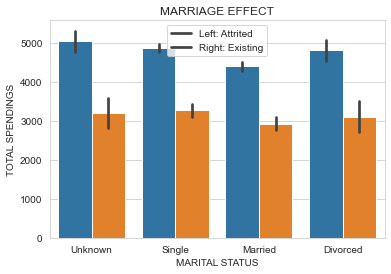

In [66]:
sns.barplot(x="Marital_Status", y="Total_Trans_Amt", hue='Attrition_Flag', data=ccc)
plt.xticks([0, 1, 2, 3], ['Unknown', 'Single', 'Married', 'Divorced'])
plt.legend(labels=['Left: Attrited', 'Right: Existing'])
plt.xlabel('MARITAL STATUS')
plt.ylabel('TOTAL SPENDINGS')
plt.title('MARRIAGE EFFECT')
plt.show()

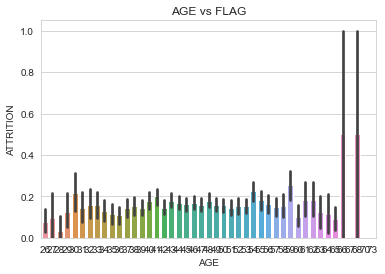

In [108]:
sns.set_style('whitegrid')
sns.barplot(x='Customer_Age', y='Attrition_Flag', data=ccc)
plt.ylabel('ATTRITION')
plt.xlabel('AGE')
plt.title('AGE vs FLAG')
plt.show()

Contacts_Count_12_mon
0     399
1    1499
2    3227
3    3380
4    1392
5     176
6      54
Name: Attrition_Flag, dtype: int64

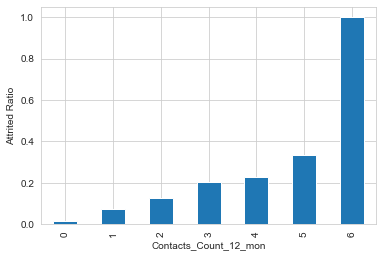

In [110]:
'''
contatos com banco nos ultimos 12 meses x attrition. Quanto maior o número de contatos, mais as pessoas dão churn

'''
contato_banco = ccc.groupby('Contacts_Count_12_mon')['Attrition_Flag'].mean()
contato_banco.plot(kind='bar', ylabel='Attrited Ratio')

ccc.groupby('Contacts_Count_12_mon')['Attrition_Flag'].count()

Months_Inactive_12_mon
0      29
1    2233
2    3282
3    3846
4     435
5     178
6     124
Name: Attrition_Flag, dtype: int64

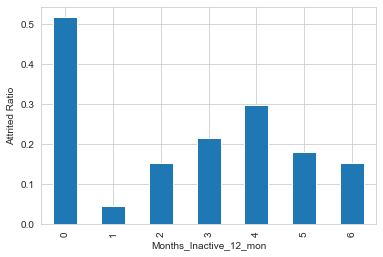

In [112]:
# 0 meses é outlier. Só 29 observações 
inatividade = ccc.groupby('Months_Inactive_12_mon')['Attrition_Flag'].mean()
inatividade.plot(kind='bar', ylabel='Attrited Ratio')

ccc.groupby('Months_Inactive_12_mon')['Attrition_Flag'].count()

Education_Level
0    1519
1    1487
2    2013
3    1013
4    3128
5     516
6     451
Name: Attrition_Flag, dtype: int64

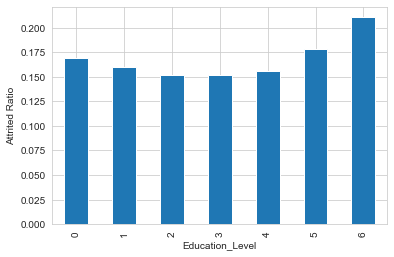

In [114]:
'''
0 é unknown. Os dados mostram que ao aumentar a escolaridade do cliente, a tendência dele a sair do banco é maior

'''
educacao = ccc.groupby('Education_Level')['Attrition_Flag'].mean()
educacao.plot(kind='bar', ylabel='Attrited Ratio')

ccc.groupby('Education_Level')['Attrition_Flag'].count()

Marital_Status
0     749
1    3943
2    4687
3     748
Name: Attrition_Flag, dtype: int64

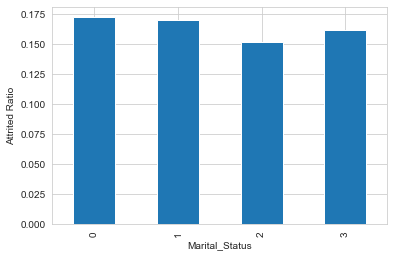

In [115]:
'''
0 é unknown. Os casados (2) são os que menos saem do banco, apesar da diferença não ser tão grande.
'''
estado_civil = ccc.groupby('Marital_Status')['Attrition_Flag'].mean()
estado_civil.plot(kind='bar', ylabel='Attrited Ratio')

ccc.groupby('Marital_Status')['Attrition_Flag'].count()

<AxesSubplot:xlabel='Income_Category', ylabel='Attrited Ratio'>

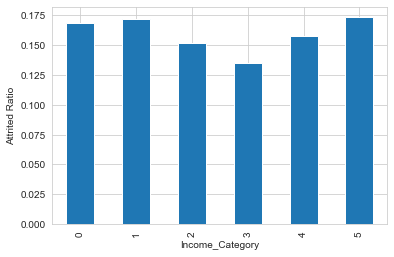

In [72]:
by_income_df = ccc.groupby('Income_Category')['Attrition_Flag'].mean()
by_income_df.plot(kind='bar', ylabel='Attrited Ratio')

<AxesSubplot:xlabel='Gender', ylabel='Attrited Ratio'>

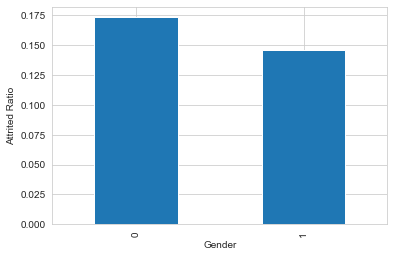

In [73]:
by_gender_df = ccc.groupby('Gender')['Attrition_Flag'].mean()
by_gender_df.plot(kind='bar', ylabel='Attrited Ratio')


Income_Category
0    1112
1    3561
2    1790
3    1402
4    1535
5     727
Name: Attrition_Flag, dtype: int64

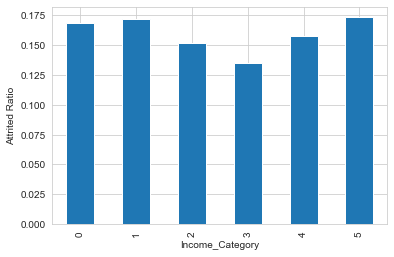

In [90]:
by_income_df = ccc.groupby('Income_Category')['Attrition_Flag'].mean()
by_income_df.plot(kind='bar', ylabel='Attrited Ratio')

ccc.groupby('Income_Category')['Attrition_Flag'].count()

Card_Category
0    9436
1     555
2     116
3      20
Name: Attrition_Flag, dtype: int64

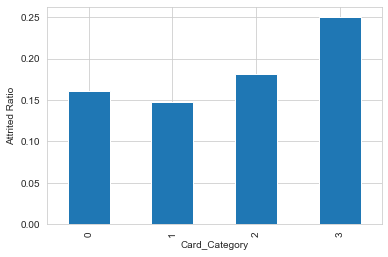

In [116]:
by_card_df = ccc.groupby('Card_Category')['Attrition_Flag'].mean()
by_card_df.plot(kind='bar', ylabel='Attrited Ratio')

ccc.groupby('Card_Category')['Attrition_Flag'].count()

In [133]:
'''
    o rotativo parece prender as pessoas ao banco, tornando-as menos propensas a saírem
    
'''


total_rotativo_0 =  ccc[ccc['Total_Revolving_Bal']==0]['Attrition_Flag'].mean()

print(f'média de pessoas que saíram com rotativo zerado é {total_rotativo_0:.2f}')

total_rotativo_1 = ccc[ccc['Total_Revolving_Bal']!=0]['Attrition_Flag'].mean()

print(f'média de pessoas que saíram com rotativo acima de zero é {total_rotativo_1:.2f}')

média de pessoas que saíram com rotativo zerado é 0.36
média de pessoas que saíram com rotativo acima de zero é 0.10


In [134]:
'''
    pela média de mudanças na quantidade de transações feitas pelo cliente, 
    percebe-se que quanto menor o número de transações, maior a chance
    dela sair do banco
'''

by_Total_revolving_df_1 = ccc[(ccc['Total_Ct_Chng_Q4_Q1'] < 0.71 )]['Attrition_Flag'].mean()
print (f'Porcentagem de pessoas abaixo da média que saíram é {by_Total_revolving_df_1:.2f}')
by_Total_revolving_df_0 = ccc[(ccc['Total_Ct_Chng_Q4_Q1'] >= 0.71 )]['Attrition_Flag'].mean()
print (f'Porcentagem de pessoas acima da média que saíram é {by_Total_revolving_df_0:.2f}')


Porcentagem de pessoas abaixo da média que saíram é 0.24
Porcentagem de pessoas acima da média que saíram é 0.08


In [9]:
# análise da diferença entre Attrited e Existing
ccc.groupby(['Attrition_Flag'], as_index=False)[['Customer_Age', 'Income_Category','Months_on_book', 'Credit_Limit']].mean()

,Attrition_Flag,Customer_Age,Income_Category,Months_on_book,Credit_Limit
0,Attrited Customer,46.510332,66.397125,36.152740,8158.579964
1,Existing Customer,46.317359,66.953753,35.949397,8555.099196


In [95]:
# análise da diferença entre Attrited e Existing
ccc.groupby(['Gender'], as_index=False)[['Customer_Age', 'Income_Category','Months_on_book', 'Credit_Limit','Attrition_Flag']].mean()

,Gender,Customer_Age,Income_Category,Months_on_book,Credit_Limit,Attrition_Flag
0,0,46.456887,0.991415,35.979097,5023.854274,0.173572
1,1,46.178863,3.315160,35.871462,12685.674963,0.146152


In [18]:
ccc.groupby([','Attrition_Flag','Gender'], as_index=False)[['Customer_Age','Months_on_book', 'Credit_Limit','Attrition_Flag', 'Income_Category']].agg(['mean', 'count'])

Customer_Age       Months_on_book        \
                                          mean count           mean count   
Education_Level Attrition_Flag                                              
College         Attrited Customer    46.310000   100      36.260000   100   
                Existing Customer    46.473968   557      35.705566   557   
Doctorate       Attrited Customer    45.915254    59      34.203390    59   
                Existing Customer    47.823529   221      37.574661   221   
Graduate        Attrited Customer    46.474403   293      35.962457   293   
                Existing Customer    46.390000  1700      35.989412  1700   
High School     Attrited Customer    48.179191   173      37.612717   173   
                Existing Customer    46.263902  1061      35.926484  1061   
Post-Graduate   Attrited Customer    46.160714    56      35.857143    56   
                Existing Customer    45.634686   271      35.033210   271   
Uneducated      Attrited Customer    46.776978   139      35.928058   139   
                Existing Customer    46.357520   758      35.831135   758   

                                  Credit_Limit       Income_Category        
                                          mean count            mean count  
Education_Level Attrition_Flag                                              
College         Attrited Customer  9336.532000   100       76.200000   100  
                Existing Customer  8550.989408   557       67.217235   557  
Doctorate       Attrited Customer  7111.381356    59       66.101695    59  
                Existing Customer  8104.816290   221       67.058824   221  
Graduate        Attrited Customer  8027.964164   293       62.935154   293  
                Existing Customer  8558.063412  1700       67.164706  1700  
High School     Attrited Customer  9116.357803   173       70.057803   173  
                Existing Customer  8395.338926  1061       68.049010  1061  
Post-Graduate   Attrited Customer  7743.282143    56       63.928571    56  
                Existing Customer  8622.301107   271       66.494465   271  
Uneducated      Attrited Customer  8205.681295   139       68.776978   139  
                Existing Customer  8751.525858   758       66.807388   758

In [135]:
'''
pode-se observar alguma grandes correlações:
    Gender com income tem 78% de correlação, provado pela media dos homens da tabela terem income muito superior ao das mulheres
    Months on book com customer age também tem forte correlação, pelo óbvio fato de pessoas mais velhas terem mais tempo de vida
    credit limit com card category tem 50% de correlação por obviedade também. Cartões de ranking mais alto disponibilizam mais crédito
'''

ccc.corr()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,-0.046430,0.007613,0.020188,0.006772,-0.006946,0.003284,0.026295,0.002086,0.134588,...,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Attrition_Flag,-0.046430,1.000000,0.018203,-0.037272,0.018991,0.008796,-0.018597,-0.013577,0.002354,0.013687,...,0.152449,0.204491,-0.023873,-0.263053,-0.000285,-0.131063,-0.168598,-0.371403,-0.290054,-0.178410
Customer_Age,0.007613,0.018203,1.000000,-0.017312,-0.122254,-0.002369,0.011265,0.023508,-0.018235,0.788912,...,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Gender,0.020188,-0.037272,-0.017312,1.000000,0.004563,-0.005087,0.000007,0.786608,0.080093,-0.006728,...,-0.011163,0.039987,0.420806,0.029658,0.418059,0.026712,0.024890,-0.067454,-0.005800,-0.257851
Dependent_count,0.006772,0.018991,-0.122254,0.004563,1.000000,0.000472,-0.000337,0.066278,0.030469,-0.103062,...,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Education_Level,-0.006946,0.008796,-0.002369,-0.005087,0.000472,1.000000,0.014875,-0.011677,0.014989,0.006613,...,0.005761,-0.006280,-0.002354,-0.006800,-0.001743,-0.010040,-0.007460,-0.004307,-0.016692,-0.001849
Marital_Status,0.003284,-0.018597,0.011265,0.000007,-0.000337,0.014875,1.000000,0.006557,-0.043905,0.012084,...,-0.001709,-0.001476,-0.031292,0.025386,-0.033562,0.036210,-0.044553,-0.075888,-0.000258,0.027451
Income_Category,0.026295,-0.013577,0.023508,0.786608,0.066278,-0.011677,0.006557,1.000000,0.077326,0.022122,...,-0.016310,0.023113,0.475972,0.034718,0.472760,0.011352,0.019651,-0.054569,-0.012657,-0.246476
Card_Category,0.002086,0.002354,-0.018235,0.080093,0.030469,0.014989,-0.043905,0.077326,1.000000,-0.012535,...,-0.014629,-0.000442,0.492446,0.026304,0.489985,0.007385,0.196003,0.134275,-0.007261,-0.198711
Months_on_book,0.134588,0.013687,0.788912,-0.006728,-0.103062,0.006613,0.012084,0.022122,-0.012535,1.000000,...,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541


In [11]:
# ccc.groupby(['Attrition_Flag'], as_index=False)[['Months_on_book',]].agg(['mean', 'count'])
# ccc.drop()
# ccc[(ccc['Months_on_book'] == 36)].groupby('Attrition_Flag').count()
i = ccc[(ccc['Months_on_book'] == 36)].index
for j in i:
    ccc.drop(i, inplace = True, axis = 0)

In [12]:
ccc

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Credit_Limit,Total_Amt_Chng_Q4_Q1
0,768805383,Existing Customer,45,M,3,High School,Married,80,Blue,39,12691.0,1.335
1,818770008,Existing Customer,49,F,5,Graduate,Single,40,Blue,44,8256.0,1.541
4,709106358,Existing Customer,40,M,3,Uneducated,Married,80,Blue,21,4716.0,2.175
14,712396908,Existing Customer,57,F,2,Graduate,Married,40,Blue,48,2436.0,1.190
18,806160108,Existing Customer,61,M,1,High School,Married,60,Blue,56,3193.0,1.831
...,...,...,...,...,...,...,...,...,...,...,...,...
10117,712503408,Existing Customer,57,M,2,Graduate,Married,100,Blue,40,17925.0,0.712
10120,710841183,Existing Customer,54,M,1,High School,Single,80,Blue,34,13940.0,0.660
10121,713899383,Existing Customer,56,F,1,Graduate,Single,40,Blue,50,3688.0,0.570
10122,772366833,Existing Customer,50,M,2,Graduate,Single,60,Blue,40,4003.0,0.703


### A fazer 

   * descobrir se dropa ou não a coluna credit
   * verificar se droparemos todas as linhas com nan ou não
   * se não dropar as linhas como faremos para preencher os Nan (ordenar por faixa de idade e inserir income e education level)
   
   

4) Feature engineering: Quais variáveis você poderia criar para enriquecer a análise?
    * 
5) Enriquecimento da base: Inclua qualquer outra informação/análise que achar importante.
    * perfil de gastos diferentes como bens de consumo ou serviços
    * 
6) Que outras bases externas ou internas voce buscaria para enriquecer as análises?
    * tipo de serviço que a pessoa presta por ex: clt, concursado, autônomo, etc
    * reclamações de call center
    * score de crédito
